# Linear Regression

## Theory

#### Question 1

#### Question 2

##### We notice that the least square method calculates for each data point x the distance between real y and the predicted linear approximation of it, the name uses 'square' in its name due to the fact that distance is usually calculated by a L2 norm.
##### Thus the entire expression simply deals with the sum of total distances of real points from the approximating line and tries to minimize it.

#### Question 3

##### The main reason for the difference lies within the implementation and essence of each type of regularization.
##### L1 focuses on minimizing the sum of differences between the predicted and real y, but it doesn't care whether to cut the difference for far outliers or for very close predictions, because it doesn't matter for the sum from where we subtract.
##### On the contrary, L2 cares a lot about how to optimize the line, because it will always tend to get the outliers closer, and not to be exactly precise for close points. For example, we can look at a case for which the difference for y1 is 3, and for y2 is 1, if we can diminsh the difference between y1s by 1, we'll get a total difference of 5 (2*2 + 1*1), but diminishing the difference for y2 will leave the sum at 9 (3*3).
##### Thus L2 is usually not interested in a precise prediction of each point, and for this reason will be delighted with many small coefficients. L1 will behave differently, in many cases it will strive to pinpoint the exact location of a certain point (causing the coefficient to vanish) because it will be simpler and more efficient for the entire model, and there's no extra value in diminishing large distances.

#### Question 4

##### Variance refers to the amount by which the estimation of f would change if we used a different training set - using a different set might cause us to fit an entirely different function, and the difference between those estimation will be the variance.
##### Bias refers to our level of simplification of the model - by using a less complex model to imitate the data, we might be less accurate, and to be further from the real-life distribution.
##### The meaning of the bias-variance trade-off term is that usually by finding a model that lowers the bias, we will cause the variance to go up, and the same the other way around, so we'd want to find a certain sweet-spot for which the bias will already be low, and the variance wouldn't go up yet, as the model won't be too complex and overfitted yet.
##### In regards to the previous questions - more flexibility equals less variance and more bias, and the other way around.


In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing(as_frame=True)
data.frame.info()
data.frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

array([[<AxesSubplot: title={'center': 'MedInc'}>,
        <AxesSubplot: title={'center': 'HouseAge'}>,
        <AxesSubplot: title={'center': 'AveRooms'}>],
       [<AxesSubplot: title={'center': 'AveBedrms'}>,
        <AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'AveOccup'}>],
       [<AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'MedHouseVal'}>]], dtype=object)

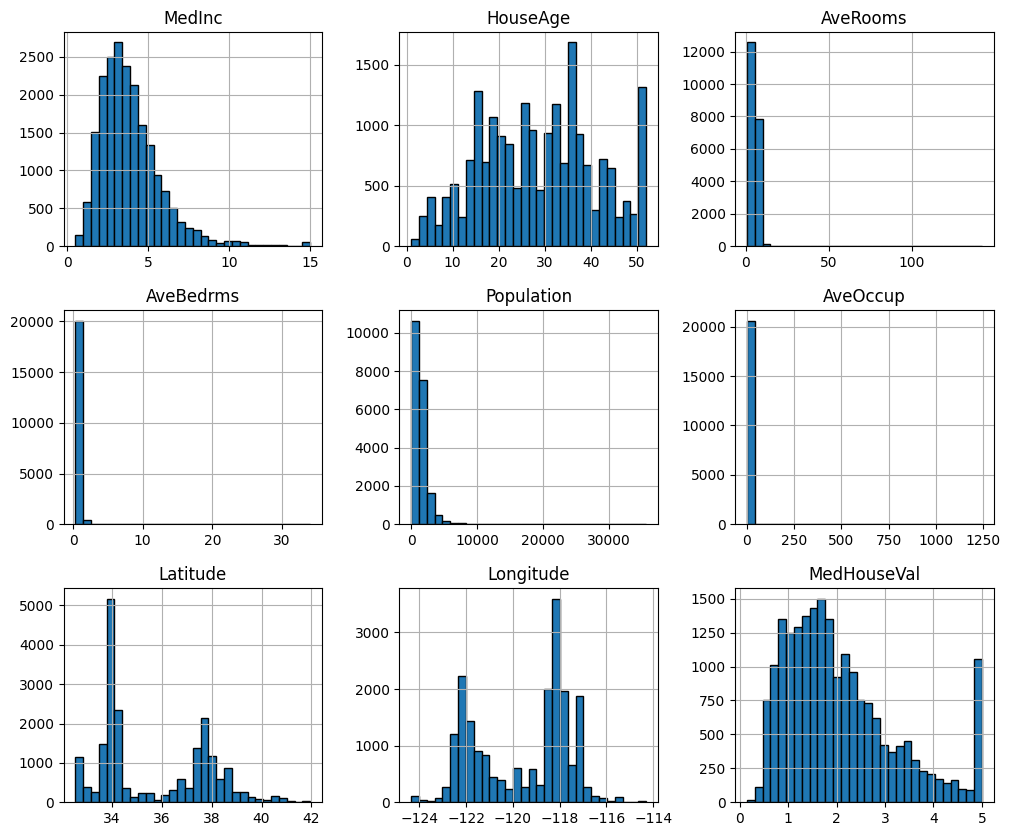

In [9]:
data.frame['HouseAge'].value_counts()
data.frame['AveBedrms'].value_counts()
data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")




<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

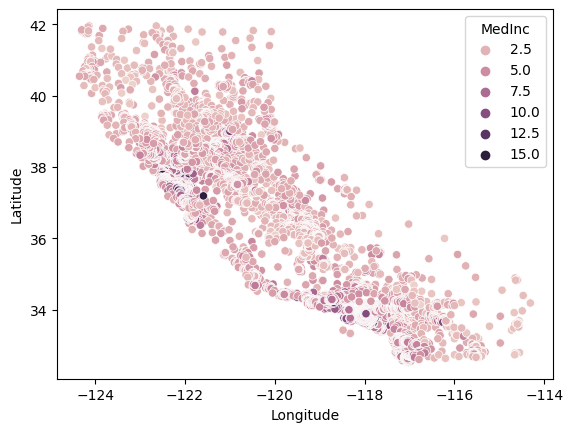

In [48]:
data.frame['MedInc'].value_counts()
sns.scatterplot(data = data.frame, x='Longitude', y='Latitude', hue='MedInc')

In [11]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
data.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


<AxesSubplot: >

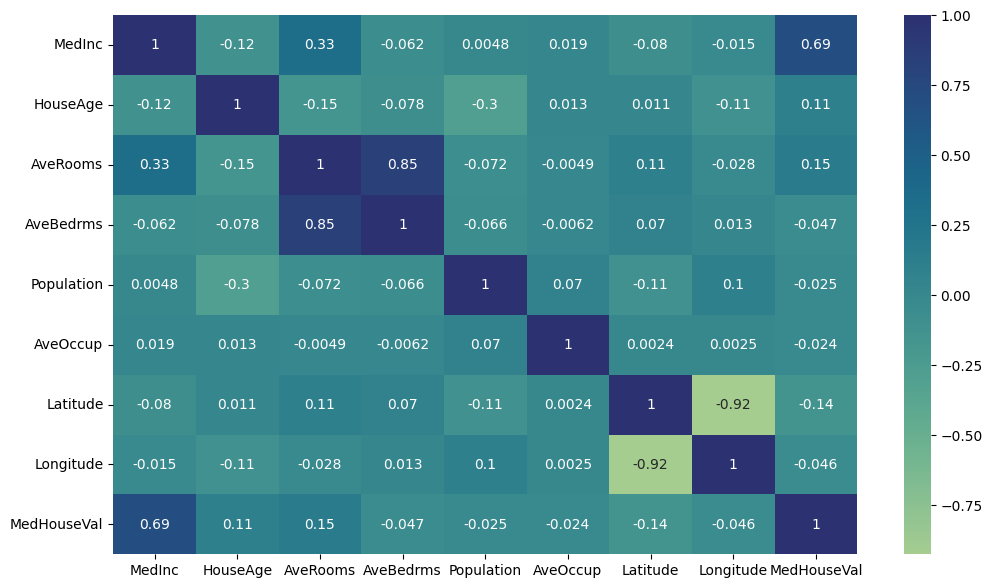

In [12]:
correlation = data.frame.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True,cmap='crest')

In [13]:
data.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data.frame, test_size=0.15,random_state=20)

In [15]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19353,3.7352,32.0,6.475358,1.141494,2053.0,3.263911,38.68,-122.87,2.28000
8804,8.2831,22.0,7.058989,1.044944,6897.0,2.767657,33.75,-118.42,5.00001
13221,3.6361,17.0,5.690135,1.087892,7343.0,3.292825,34.02,-117.71,1.57700
8722,5.7654,35.0,5.755474,1.018248,743.0,2.711679,33.84,-118.36,3.43000
9242,2.5388,12.0,4.508816,0.954660,1399.0,3.523929,36.98,-120.07,0.59600
...,...,...,...,...,...,...,...,...,...
1607,2.9167,24.0,4.766719,1.056765,1750.0,1.360809,37.87,-122.08,1.02700
3915,3.8516,37.0,5.492958,0.968310,763.0,2.686620,34.19,-118.52,2.06900
14729,4.4583,31.0,5.982222,0.988889,1129.0,2.508889,32.80,-117.02,1.70000
4367,5.7778,41.0,5.274399,1.046676,1364.0,1.929279,34.10,-118.27,4.12700


In [16]:
mean_med_inc = train_data["MedInc"].values.mean()
mean_target = train_data["MedHouseVal"].values.mean()

beta = sum((train_data["MedInc"] - mean_med_inc)*(train_data["MedHouseVal"] - mean_target))/sum((train_data["MedInc"] - mean_med_inc)**2)
bias = mean_target - (beta * mean_med_inc)
train_pred_target_vec = beta * train_data["MedInc"].values + bias
train_pred_target_vec
train_R = sum((train_pred_target_vec - mean_target)**2) / sum((train_data["MedHouseVal"].values - mean_target)**2)

test_pred_target_vec = beta * test_data["MedInc"].values + bias
test_R = sum((test_pred_target_vec - test_data["MedHouseVal"].values.mean())**2) / sum((test_data["MedHouseVal"].values - test_data["MedHouseVal"].values.mean())**2)

print (f'train_R²_squared = {train_R} \ntest_R²_squared = {test_R}')

train_R²_squared = 0.4724337173495869 
test_R²_squared = 0.4487726121169956


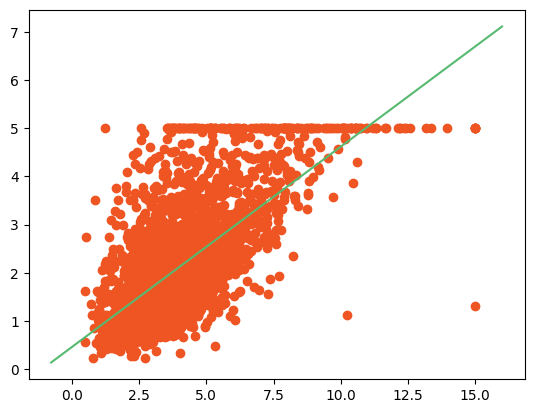

In [17]:
max_x = np.max(test_data["MedInc"].values) + 1
min_x = np.min(test_data["MedHouseVal"].values) - 1

# calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = bias + beta * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(test_data["MedInc"].values, test_data["MedHouseVal"].values, c='#ef5423', label='data points')

# plt.xlabel('Head Size in cm')
# plt.ylabel('Brain Weight in grams')
# plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

X_train = train_data["MedInc"].values.reshape(-1, 1)
X_test = test_data["MedInc"].values.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(X_train, train_data["MedHouseVal"].values)
print(linreg.coef_)
y_pred = linreg.predict([[3]])
l1 = linreg.score(X_train, train_data["MedHouseVal"].values)
l2 = linreg.score(X_test, test_data["MedHouseVal"].values)
print (f'train_R²_squared = {l1} \ntest_R²_squared = {l2}')
print(y_pred[0])
y_pred = linreg.predict(X_test)
print(y_pred)

[0.41587807]
train_R²_squared = 0.4724337173495746 
test_R²_squared = 0.47893924724330816
1.7067705361391026
[1.56616216 3.05172021 1.29563348 ... 1.70677054 2.12264861 1.80271361]


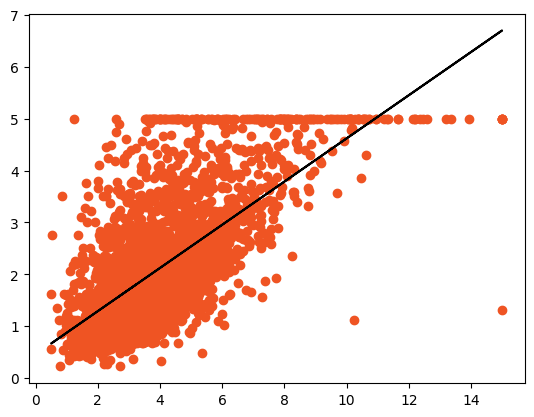

In [19]:
plt.scatter(X_test, test_data["MedHouseVal"].values, c='#ef5423')
plt.plot(X_test, y_pred,color='k') 

plt.show()

In [20]:
data.frame["twice_MedInc"] = 2*data.frame["MedInc"]
train_data, test_data = train_test_split(data.frame, test_size=0.15,random_state=20)
X_train = train_data[["MedInc", "twice_MedInc"]].values
X_test = test_data[["MedInc", "twice_MedInc"]].values
linreg = LinearRegression()
linreg.fit(X_train, train_data["MedHouseVal"].values)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
l1 = linreg.score(X_train, train_data["MedHouseVal"].values)
l2 = linreg.score(X_test, test_data["MedHouseVal"].values)
print (f'train_R²_squared = {l1} \ntest_R²_squared = {l2}')
print(y_pred)

[-1.28354566e+12  6.41772832e+11]
train_R²_squared = 0.47243207522250175 
test_R²_squared = 0.47908932906531543
[1.56350088 3.05663621 1.29174113 ... 1.70490738 2.12287613 1.80133132]


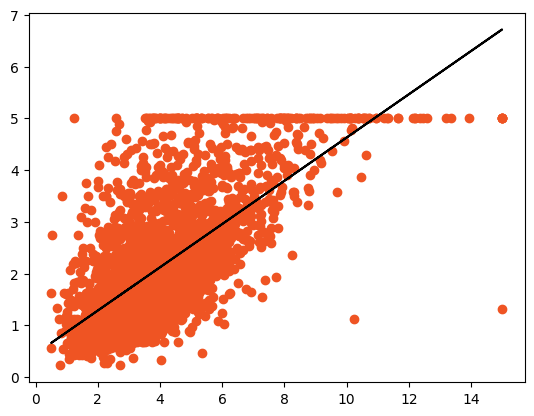

In [21]:
plt.scatter(test_data["MedInc"], test_data["MedHouseVal"].values, c='#ef5423')
plt.plot(test_data["MedInc"], y_pred,color='k') 

plt.show()

In [22]:
train_data, test_data = train_test_split(data.frame, test_size=0.15,random_state=20)
X_train = train_data.values[:,:8]
X_test = test_data.values[:,:8]
linreg = LinearRegression()
linreg.fit(X_train, train_data["MedHouseVal"].values)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
l1 = linreg.score(X_train, train_data["MedHouseVal"].values)
l2 = linreg.score(X_test, test_data["MedHouseVal"].values)
print (f'train_R²_squared = {l1} \ntest_R²_squared = {l2}')

[ 4.34958169e-01  9.42288747e-03 -1.07553176e-01  6.42177947e-01
 -4.65581416e-06 -3.50635163e-03 -4.22135419e-01 -4.36536209e-01]
train_R²_squared = 0.606891705258811 
test_R²_squared = 0.6024655541428787


In [23]:
train_data, test_data = train_test_split(data.frame, test_size=0.15,random_state=20)
X_train = np.concatenate([train_data.values[:,:4], train_data.values[:,5:8]], axis=1)
X_test = np.concatenate([test_data.values[:,:4], test_data.values[:,5:8]], axis=1)
linreg = LinearRegression()
linreg.fit(X_train, train_data["MedHouseVal"].values)
print(linreg.coef_)
y_pred = linreg.predict(X_test)
l1 = linreg.score(X_train, train_data["MedHouseVal"].values)
l2 = linreg.score(X_test, test_data["MedHouseVal"].values)
print (f'train_R²_squared = {l1} \ntest_R²_squared = {l2}')

[ 0.43502626  0.00956245 -0.10730992  0.64181549 -0.00354324 -0.42140695
 -0.43597989]
train_R²_squared = 0.6068741400509381 
test_R²_squared = 0.6024768168248319


In [24]:
from sklearn.preprocessing import PolynomialFeatures
train_data, test_data = train_test_split(data.frame, test_size=0.15,random_state=20)
X_train = train_data["MedInc"].values.reshape(-1, 1)
X_test = test_data["MedInc"].values.reshape(-1, 1)
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)
linreg = LinearRegression()
linreg.fit(poly_features, train_data["MedHouseVal"].values)
y_pred = linreg.predict(poly_features_test)
l1 = linreg.score(poly_features, train_data["MedHouseVal"].values)
l2 = linreg.score(poly_features_test, test_data["MedHouseVal"].values)
print (f'train_R²_squared = {l1} \ntest_R²_squared = {l2}')
print(y_pred)

train_R²_squared = 0.47700586613902096 
test_R²_squared = 0.48355005242172877
[1.54905249 3.10849835 1.23659171 ... 1.70799004 2.16420802 1.81507948]


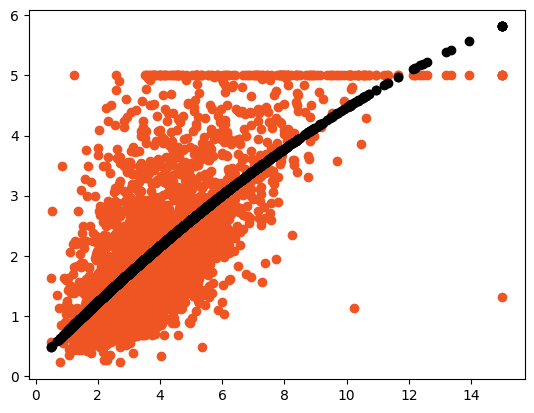

In [25]:
plt.scatter(test_data["MedInc"], test_data["MedHouseVal"].values, c='#ef5423')
plt.scatter(X_test, y_pred,color='k') 

plt.show()

In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_data, test_data = train_test_split(data.frame, random_state=20, test_size=0.15)

steps = [
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]
X_train = train_data.values[:,:8]
X_test = test_data.values[:,:8]

pipeline = Pipeline(steps)

pipeline.fit(X_train, train_data["MedHouseVal"].values)
print(X_test.shape)
y_pred = pipeline.predict(X_test)
print(y_pred.shape)
print('Training score: {}'.format(pipeline.score(X_train, train_data["MedHouseVal"].values)))
print('Test score: {}'.format(pipeline.score(X_test, test_data["MedHouseVal"].values)))



(3096, 8)
(3096,)
Training score: 0.7365042308478881
Test score: 0.7025196824273059


C:\Users\jony0\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06377e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


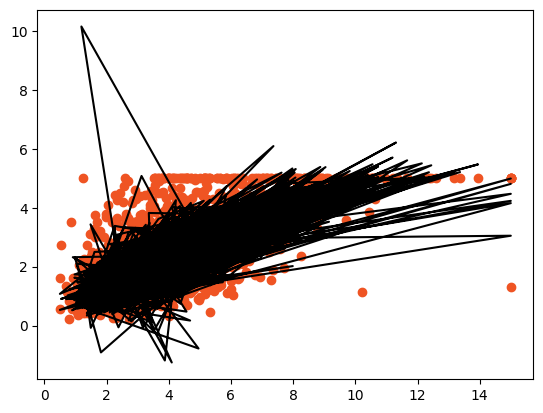

In [27]:
plt.scatter(test_data["MedInc"], test_data["MedHouseVal"].values, c='#ef5423')
plt.plot(X_test[:,0], y_pred,color='k') 

plt.show()

In [28]:


train_data, test_data = train_test_split(data.frame, random_state=20, test_size=0.15)

steps = [
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]
X_train = train_data.values[:,:8]
X_test = test_data.values[:,:8]

pipeline = Pipeline(steps)

pipeline.fit(X_train, train_data["MedHouseVal"].values)
y_pred = pipeline.predict(X_test)
print('Training score: {}'.format(pipeline.score(X_train, train_data["MedHouseVal"].values)))
print('Test score: {}'.format(pipeline.score(X_test, test_data["MedHouseVal"].values)))



Training score: 0.6840428952720287
Test score: 0.6656711912845819


C:\Users\jony0\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.743e+03, tolerance: 2.325e+00
  model = cd_fast.enet_coordinate_descent(


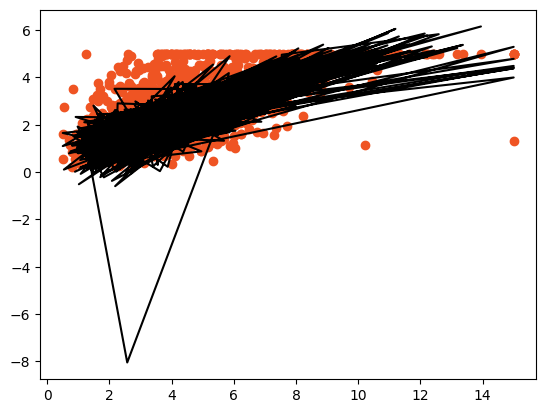

In [29]:
plt.scatter(test_data["MedInc"], test_data["MedHouseVal"].values, c='#ef5423')
plt.plot(X_test[:,0], y_pred,color='k') 

plt.show()

In [32]:
data.frame['AveBedrms'].sort_values().tail(10)

1102      9.703704
1912     10.153846
2395     10.270270
1913     11.000000
1240     11.181818
9676     11.410714
12447    14.111111
11862    15.312500
1914     25.636364
1979     34.066667
Name: AveBedrms, dtype: float64

In [33]:
data.frame['AveOccup'].sort_values().tail(20)

2511       14.000000
15790      15.602941
7164       15.812155
19524      16.048780
16672      16.937500
1039       17.177700
19435      18.444444
4479       18.500000
14756      18.821818
20352      19.312500
5986       21.333333
13366      33.952941
8874       41.214286
16420      51.400000
12104      63.750000
9172       83.171429
13034     230.172414
16669     502.461538
3364      599.714286
19006    1243.333333
Name: AveOccup, dtype: float64

In [45]:
df_copy = data.frame.copy()
df_copy = df_copy.drop([13366,8874,16420,12104,9172,13034,16669,3364,19006,1979,1914,11862,12447,9676,1240,1912,1913,2395])
df_copy['OccupantsPerRooms'] = df_copy['AveOccup']/df_copy['AveRooms']
df_copy['LocationAverage'] = df_copy['Latitude']/df_copy['Longitude']

In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_data, test_data = train_test_split(df_copy, random_state=20, test_size=0.15)

steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]
X_train = np.concatenate([train_data.values[:,:8],train_data.values[:,11:]],axis=1)
X_test = np.concatenate([test_data.values[:,:8],test_data.values[:,11:]],axis=1)

pipeline = Pipeline(steps)

pipeline.fit(X_train, train_data["MedHouseVal"].values)
print(X_test.shape)
y_pred = pipeline.predict(X_test)
print(y_pred.shape)
print('Training score: {}'.format(pipeline.score(X_train, train_data["MedHouseVal"].values)))
print('Test score: {}'.format(pipeline.score(X_test, test_data["MedHouseVal"].values)))



(3094, 9)
(3094,)
Training score: 0.7534116887052833
Test score: 0.7371817978991674
